# Gradient descent for ridge regression

The goal of this exercise is to implement gradient descent, stochastic gradient descent and mini-batch gradient descent methods for ridge regression. We re going to implement them by defining the necessary functions, and then demonstrate their performance using a specific dataset, and appropriate visualization techniques.

## Import Libraries

In [1]:
# For large and multi-dimensional arrays
import numpy as np
# For data manipulation and analysis
import pandas as pd
# For data vizualization 
import matplotlib.pyplot as plt
# For ML algorithms
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


## Define necessary functions

First, we want a function to compute the predictions that are created for a given dataset.

In [76]:
def predict(X, theta):
  return np.dot(X, theta[0:10]) + theta[10]

We also need a function to compute the gradient of the error

In [62]:
def gradient(X, y, theta): 
    h = np.dot(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 

We also need a function to compute the Mean Squared Error (MSE), which is defined as: $$MSE(w) = \frac{1}{m}\sum_{i=1}^{m}(h_w(x^{(i)}) - y^{(1)})^2$$



In [63]:
def cost(X, y, theta): 
    h = np.dot(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= X.shape[0]
    return J

## Different kinds of gradient descent

We are going to implement 3 different types of gradient descent, in order to check the difference in their behaviors when it comes down to correctly classifying a dataset. We are going to define 3 functions, that perform:
 - Gradient Descent
 - Stochastic Gradient Descent
 - Mini-Batch Gradient Descent

### Gradient descent

The most simple method of implementing gradient descent, is to iterate the whole dataset in each loop. 

Convergence to the unique global minimum is guaranteed (as long as we pick η small enough) but may be very slow: we have to cycle through all the training data for every step, and there may be many steps.

In [64]:
# function to perform gradient descent
def gradientDescent(X, y, learning_rate = 0.1, steps = 1000): 
    X = np.c_[X, np.ones(X.shape[0])] #add a column of ones to X for the bias term
    theta = np.zeros((X.shape[1])) #create inital weights w0, w1..wd
    error_list = []  
    for s in range(steps):
        theta = theta - learning_rate * gradient(X, y, theta) 
        error_list.append(cost(X, y, theta)) #useful for plotting changes when using different batch sizes
  
    return theta, error_list 

### Stochastic Gradient descent

In this case, we consider only a single training instance at a time (chosen randomly), taking a step after each one using the following equation which is appropriate for a single training instance (x, y): 
$$ w_i \leftarrow w_i - \eta(h_w(x)-y)x_i$$

In order to define this method, we must first define the `learning_schedule`, which  determines the learning rate at each iteration

In [65]:
def learning_schedule(t, t_0, t_1):
    return t_0 / (t + t_1)

Now let's define the stochastic gradient descent function

In [170]:
def stochasticGradientDescent(X, y, learning_rate = 0.1, steps = 1000, epochs = 50):
    X = np.c_[X, np.ones(X.shape[0])] #add a column of ones to X for the bias term
    theta = np.zeros((X.shape[1])) #create inital weights w0, w1..wd
    error_list = []
    t0 = 5 # learning_schedule hyperparameters
    t1 = 50 
    m = X.size
    for e in range(epochs):
        for s in range(m):
            random_index = np.random.randint(m - 1)
            xi = X[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]            
            eta = learning_schedule(e * m + s, t0, t1)
            theta = theta - eta * gradient(xi, yi, theta)
            error_list.append(cost(xi, yi, theta))
    return theta, error_list

### Mini-Batch Gradient descent

In this case, at each step, instead of computing the gradients based on the full training set (as in batch gradient descent) or based on just one instance (as in stochastic gradient descent), mini-batch gradient descent computes the gradients on small random sets of instances called mini-batches.

In [67]:
def miniBatchGradientDescent(X, y, learning_rate = 0.1, steps = 1000, epochs = 50, batch_size = 10):
    X = np.c_[X, np.ones(X.shape[0])] #add a column of ones to X for the bias term
    theta = np.zeros((X.shape[1], 0)) #create inital weights w0, w1..wd
    error_list = []
    t0 = 5 # learning_schedule hyperparameters
    t1 = 50 
    m = X.size
    for e in range(epochs):
        for s in tange(m):
            random_index = np.random.randint(m - batch_size)
            xi = X[random_index : random_index + batch_size]
            yi = y[random_index : random_index + batch_size]            
            eta = learning_schedule(e * m + s, t0, t1)
            theta = theta - eta * gradient(xi, yi, theta)
            error_list.append(cost(xi, yi, theta))
    return theta, error_list

## Demonstration of the algorithms

We are going to use the `California Housing Dataset`, in order to demonstrate the algorithms that we implemented

### Import the dataset

We are going to import the dataset...

In [68]:
df = pd.read_csv("HousingData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   MedInc              16512 non-null  float64
 2   HouseAge            16512 non-null  float64
 3   AveRooms            16512 non-null  float64
 4   AveBedrms           16512 non-null  float64
 5   Population          16512 non-null  float64
 6   AveOccup            16512 non-null  float64
 7   Latitude            16512 non-null  float64
 8   Longitude           16512 non-null  float64
 9   Median House Value  16512 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.3 MB


...and take a look at its columns

In [69]:
df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,0,3.9816,27.0,4.928668,1.122476,3009.0,4.049798,33.73,-117.93,1.795
1,1,3.4531,23.0,4.021339,1.099338,2511.0,1.847682,34.14,-118.13,2.109
2,2,6.3942,4.0,5.681272,1.095774,5613.0,2.176425,37.78,-121.95,3.567
3,3,2.2243,32.0,5.685221,1.009597,1542.0,2.959693,38.69,-121.45,0.892
4,4,3.0217,9.0,5.006324,1.071146,3265.0,2.581028,37.69,-121.04,1.609


In [101]:
# chosen_idx = np.random.choice(1000, replace=False, size=200)
# df_trimmed = df.iloc[chosen_idx]
# df_trimmed.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
751,751,5.5347,29.0,4.239560,1.149451,686.0,1.507692,33.90,-118.42,5.00001
883,883,4.8214,35.0,5.131707,1.058537,1225.0,2.987805,37.72,-122.41,2.42900
480,480,1.9167,42.0,3.193916,1.058935,2099.0,3.990494,34.03,-118.29,1.36400
589,589,3.7500,10.0,16.847534,3.237668,546.0,2.448430,38.23,-120.34,1.21400
880,880,1.6198,30.0,4.357143,1.035714,425.0,3.035714,37.79,-122.23,1.22700


### Splitting 

We are going to split the dataset into training and testing ones

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df, df['Median House Value'], test_size=.2)

### Scaling

In order for our algorithms to work correctly, we must ensure that our features are of the same scale. We can do this easily by using `sklearn`'s methods

In [147]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

Let's take a look at the distribution of our first feature's data in our dataset

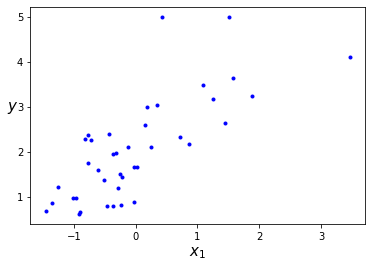

In [119]:
# plt.plot(X_test_scaled[:,1], y_test, 'b.')
# plt.xlabel("$x_1$", fontsize=15)
# plt.ylabel("$y$", rotation=0, fontsize=15)
# plt.show()

### Gradient Descent

Let's run the `gradientDescent` algorithm for our dataset. It will return the best weights found, as well as a list containing the error in every iteration. We are going to select the learning rate to be `0.001`, and see what results we are getting

In [162]:
best_theta, error = gradientDescent(X_train_scaled, y_train, 0.001, steps = 100)

In [163]:
print(best_theta)

[-6.80149659e+138 -1.22740160e+140  2.01654376e+139 -2.72908875e+140
 -2.32938219e+140  6.08883065e+139  8.63425249e+138 -1.73133709e+140
  1.67082332e+140 -9.44322492e+139 -6.00849773e+125]


Let's plot the error as the iterations increase. It should be getting less with each iteration. The algorithm will not be working correctly if any other kind of plot appears

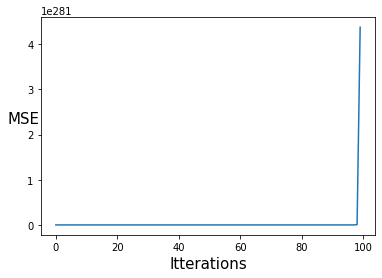

In [164]:
y_pred = predict(X_train_scaled, best_theta)
# plt.plot(X_train_scaled[:,2],y_pred,'r-')
# plt.plot(X_test_scaled[:,2], y_test, 'b.')
plt.plot(error)
plt.xlabel("Itterations", fontsize=15)
plt.ylabel("MSE", rotation=0, fontsize=15)
plt.show()

We observe that the plot is completely wrong, and thus we are going to decrease the learning rate to `0.0001`

In [165]:
best_theta, error = gradientDescent(X_train_scaled, y_train, 0.00001, steps = 100)

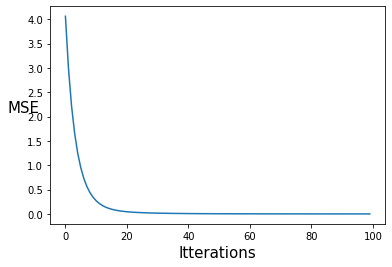

In [166]:
y_pred = predict(X_train_scaled, best_theta)
# plt.plot(X_train_scaled[:,2],y_pred,'r-')
# plt.plot(X_test_scaled[:,2], y_test, 'b.')
plt.plot(error)
plt.xlabel("Itterations", fontsize=15)
plt.ylabel("MSE", rotation=0, fontsize=15)
plt.show()

We now see that the error decreases as the iterations increase. Thus, our model is working correctly.

### Stochastic Gradient Descent

This time, we are going to set the learning rate to `0.00001`, and see what results we are getting

In [171]:
best_theta, error = stochasticGradientDescent(X_train_scaled, y_train, 0.00001, steps = 100)

<ipython-input-63-d0c8703b3774>:4: RuntimeWarning: invalid value encountered in double_scalars
  J /= X.shape[0]


KeyboardInterrupt: 